## 중심적 경향 측정
"평균"이 평균인가?

In [4]:
import pandas as pd

In [5]:
%matplotlib inline

In [6]:
연령 = pd.read_excel('share/data/ages.xlsx')
연령[:5]

,연령
0,30
1,15
2,15
3,15
4,29


In [7]:
연령.mean()

연령    22.9032
dtype: float64

45세 미만의 연령대만 선택

In [8]:
연령[연령 < 45].mean()

연령    20.625457
dtype: float64

In [9]:
(연령['연령'] < 45).value_counts()

True     4651
False     349
Name: 연령, dtype: int64

## 중앙값 
전체 자료를 딱 절반으로 나누는 기준값

In [10]:
연령.median()

연령    15
dtype: float64

In [11]:
수영강습생 = pd.read_excel('share/data/swim_class.xlsx')

이 강좌 내가 들어도 될까?


In [12]:
수영강습생.mean()

나이    17
dtype: float64

In [13]:
수영강습생.median()

나이    17
dtype: float64

array([[<matplotlib.axes.AxesSubplot object at 0x7fea1b37b898>]], dtype=object)

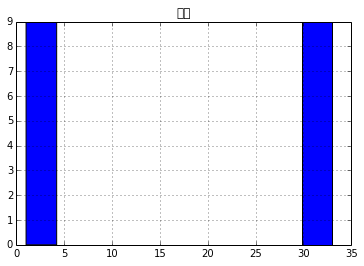

In [14]:
수영강습생.hist()

## 최빈값
가장 빈번하게 등장하는 값

In [15]:
수영강습생.mode()

,나이,성별
0,2,여자
1,32,NaN


## 중심적 경향의 변화
평균 연봉과 연봉인상

In [16]:
연봉 = pd.read_excel('share/data/salary.xlsx')

In [17]:
연봉[:3]

,연봉
0,1500.000000
1,2004.995381
2,3949.137327


array([[<matplotlib.axes.AxesSubplot object at 0x7fea112bea20>]], dtype=object)

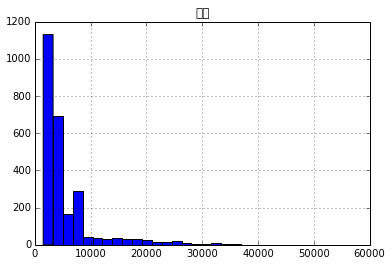

In [18]:
연봉.hist(bins=30)

In [19]:
연봉.mean()

연봉    5513.759071
dtype: float64

In [20]:
연봉.median()

연봉    3585.611774
dtype: float64

In [21]:
연봉.mode()

,연봉
0,1500


In [22]:
연봉.max()

연봉    54640.206133
dtype: float64

In [23]:
연봉.min()

연봉    1500
dtype: float64

평균연봉 15%인상안

In [24]:
(연봉 * 1.15).mean()

연봉    6340.822932
dtype: float64

In [25]:
(연봉 * 1.15).median()

연봉    4123.453541
dtype: float64

In [26]:
(연봉 * 1.15).mode()

,연봉
0,1725


In [27]:
(연봉 * 1.15).max()

연봉    62836.237053
dtype: float64

1000 만원 인상

In [28]:
(연봉 + 1000).mean()

연봉    6513.759071
dtype: float64

In [29]:
(연봉 + 1000).median()

연봉    4585.611774
dtype: float64

In [30]:
(연봉 + 1000).mode()

,연봉
0,2500


In [31]:
(연봉 + 1000).max()

연봉    55640.206133
dtype: float64

# 분포와 범위

In [32]:
게임당점수 = pd.read_excel('share/data/player_stats.xlsx')

In [33]:
게임당점수

,이성주,김성주,장성주
0,7,7,3
1,8,9,3
2,9,9,6
3,9,10,7
4,10,10,7
5,10,10,10
6,11,10,10
7,11,11,10
8,12,11,11
9,13,13,13


In [34]:
게임당점수.mean()

이성주    10
김성주    10
장성주    10
dtype: float64

In [35]:
게임당점수.median()

이성주    10
김성주    10
장성주    10
dtype: float64

In [40]:
def 범위구하기(수치) :
    return 수치.max() - 수치.min()

함수가 각 열에 대해서 적용됩니다.

In [41]:
게임당점수.apply(범위구하기)

이성주     6
김성주     6
장성주    27
dtype: float64

특이한 값 하나를 설정해 보겠습니다.

In [42]:
게임당점수.ix[10, '이성주'] = 50
게임당점수[-2:]

,이성주,김성주,장성주
9,13,13,13
10,50,NaN,30


이상치가 포함되면 범위가 크게 달라진다.

In [44]:
게임당점수.apply(범위구하기)

이성주    43
김성주     6
장성주    27
dtype: float64

## 사분범위

전체를 균등하게 4개로 나누어, 중앙의 두 개만 취해 이상치를 제거하는 표준화된 방법

"이상한 값입니다."
"왜?"
"사분범위 밖이니까요"


In [55]:
print(pd.qcut(게임당점수['이성주'], 4))

사분위수 = pd.qcut(게임당점수['이성주'], 4).value_counts().sort_index()
사분위수

0         [7, 9]
1         [7, 9]
2         [7, 9]
3         [7, 9]
4        (9, 10]
5        (9, 10]
6     (10, 11.5]
7     (10, 11.5]
8     (11.5, 50]
9     (11.5, 50]
10    (11.5, 50]
Name: 이성주, dtype: category
Categories (4, object): [[7, 9] < (9, 10] < (10, 11.5] < (11.5, 50]]


[7, 9]        4
(9, 10]       2
(10, 11.5]    2
(11.5, 50]    3
dtype: int64

In [52]:
사분범위 = 사분위수.index[1:-1]
사분범위

CategoricalIndex(['(9, 10]', '(10, 11.5]'], categories=['[7, 9]', '(9, 10]', '(10, 11.5]', '(11.5, 50]'], ordered=True, dtype='category')

In [53]:
범위여부 = pd.qcut(게임당점수['이성주'], 4).isin(사분범위)
범위여부

0     False
1     False
2     False
3     False
4      True
5      True
6      True
7      True
8     False
9     False
10    False
Name: 이성주, dtype: bool

In [56]:
사분범위내점수 = 게임당점수['이성주'][범위여부]
사분범위내점수

4    10
5    10
6    11
7    11
Name: 이성주, dtype: float64

In [57]:
사분범위내점수.mean()

10.5

In [58]:
사분범위내점수.median()

10.5

In [59]:
범위구하기(사분범위내점수)

1.0

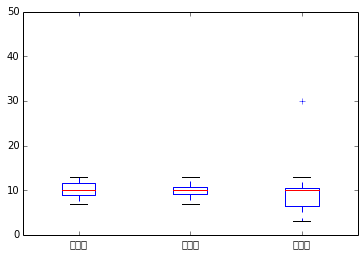

In [60]:
게임당점수.plot(kind='box')

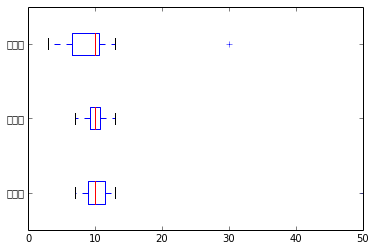

In [61]:
게임당점수.plot(kind='box', vert=False)

연습

기상청의 날씨 데이터는 /share/data/weather.xlsx에 담겨 있다.

1. 서울과 수원의 일 평균 온도의 중앙값 산출
2. 서울과 수원의 일 평균 온도의 범위 산출 (max - min)


In [62]:
날씨 = pd.read_excel('share/data/weather.xlsx')

In [63]:
날씨[:3]

,location,date,weekDay,avgTemp,highestTemp,lowestTemp,precipitation,snow,windSpeed,humidity,cloud,dayTime,weather
0,seoul,2013-08-01,thur,28.0,32.1,24.5,-,-,1.8,66,7.1,6.0,구름많음
1,seoul,2013-08-02,fri,27.4,29.3,25.2,7.5,-,2.1,79,9.1,0.9,흐림/안개/비
2,seoul,2013-08-03,sat,28.9,32.6,26.7,0.1,-,3.6,72,8.1,8.9,흐림/소나기


In [69]:
날씨색인 = 날씨.set_index('location')

In [95]:
서울날씨 = 날씨색인.ix['seoul']

In [96]:
서울날씨['avgTemp'].median()

14.8

In [86]:
지역 = 날씨['location']
지역[:3]

0    seoul
1    seoul
2    seoul
Name: location, dtype: object

In [88]:
서울여부 = 지역 == 'seoul'

In [97]:
서울일평균 = 날씨[서울여부]['avgTemp']
서울일평균.median()

14.8

In [98]:
서울일평균.max() - 서울일평균.min()

41.200000000000003

In [74]:
수원날씨 = 날씨색인.ix['suwon']

In [75]:
수원날씨['avgTemp'].median()

14.25

In [99]:
수원여부 = 지역 == 'suwon'

In [102]:
수원일평균 = 날씨[수원여부]['avgTemp']
수원일평균.median()

14.25

In [103]:
수원일평균.max() - 수원일평균.min()

38.5

In [78]:
pd.qcut(서울날씨['avgTemp'], 4).value_counts()

[-9.8, 3.8]    185
(23, 31.4]     182
(3.8, 14.8]    182
(14.8, 23]     181
dtype: int64

In [79]:
pd.qcut(수원날씨['avgTemp'], 4).value_counts()

(14.25, 22.7]     183
[-8.1, 3.525]     183
(22.7, 30.4]      182
(3.525, 14.25]    182
dtype: int64

연습

사용자의 연령대 데이터는 share/data/ages.xlsx에 대해 다음을 수행
1. 범위산출
2. 평균과 사분범위내 평균 비교

In [80]:
연령 = pd.read_excel('share/data/ages.xlsx')

In [81]:
연령[:3]

,연령
0,30
1,15
2,15


분산과 표준편차

In [104]:
게임당점수.var()

이성주    148.454545
김성주      2.444444
장성주     54.200000
dtype: float64

In [105]:
게임당점수.std()

이성주    12.184192
김성주     1.563472
장성주     7.362065
dtype: float64

## 표준 점수

"평소에 비해 얼마나 잘한 걸까?"

$$표준점수 Z = \frac{x-\mu}-{\sigma}, \mu:평균, \sigma: 표준편차

In [111]:
게임표준점수 = (게임당점수 - 게임당점수.mean()) / 게임당점수.std() #열별로 계산됨

In [112]:
게임표준점수

,이성주,김성주,장성주
0,-0.544670,-1.918806,-0.950820
1,-0.462596,-0.639602,-0.950820
2,-0.380523,-0.639602,-0.543326
3,-0.380523,0.000000,-0.407494
4,-0.298449,0.000000,-0.407494
5,-0.298449,0.000000,0.000000
6,-0.216376,0.000000,0.000000
7,-0.216376,0.639602,0.000000
8,-0.134302,0.639602,0.135831
9,-0.052229,1.918806,0.407494


0 늘하던대로, - 하던것 보다 못함, + 하던것보다 잘함


In [106]:
게임당점수

,이성주,김성주,장성주
0,7,7,3
1,8,9,3
2,9,9,6
3,9,10,7
4,10,10,7
5,10,10,10
6,11,10,10
7,11,11,10
8,12,11,11
9,13,13,13
